In [1]:
#Some very important libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates
import seaborn as sns

In [2]:
#Loading the joined dataset

movies=pd.read_csv('full_movies.csv')
movies.head(10)

,Unnamed: 0,Unnamed: 0.1,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,...,tmdb_cast,actors_list,main_actors,production_companies,release_date,tmdb_vote_avg,vote_count,revenue,budget,P_L
0,0,0,53207,88 Minutes (2008),"['Crime', 'Drama', 'Mystery', 'Thriller']",2008,0,0,0,0,...,"[{'cast_id': 1, 'character': 'Jack Gramm', 'cr...","['Al Pacino', 'Alicia Witt', 'Leelee Sobieski'...","['Al Pacino', 'Alicia Witt', 'Leelee Sobieski']","['TriStar Pictures', 'Brightlight Pictures', '...",2007-02-14,5.7,422,16930884,30000000,-13069116
1,1,1,55603,My Mom's New Boyfriend (2008),"['Action', 'Comedy', 'Romance', 'Thriller']",2008,0,0,0,1,...,"[{'cast_id': 11, 'character': 'Marthy Durand',...","['Meg Ryan', 'Antonio Banderas', 'Selma Blair'...","['Meg Ryan', 'Antonio Banderas', 'Selma Blair']",['3L Productions'],2008-04-30,5.4,95,0,0,0
2,2,2,55830,Be Kind Rewind (2008),['Comedy'],2008,0,0,0,1,...,"[{'cast_id': 12, 'character': 'Jerry', 'credit...","['Jack Black', 'Yasiin Bey', 'Danny Glover', '...","['Jack Black', 'Yasiin Bey', 'Danny Glover']","['Partizan', 'New Line Cinema', 'Focus Features']",2008-01-20,6.2,573,30600000,20000000,10600000
3,3,3,56949,27 Dresses (2008),"['Comedy', 'Romance']",2008,0,0,0,1,...,"[{'cast_id': 14, 'character': 'Jane Nichols', ...","['Katherine Heigl', 'James Marsden', 'Malin Åk...","['Katherine Heigl', 'James Marsden', 'Malin Åk...","['Fox 2000 Pictures', 'Spyglass Entertainment'...",2008-01-10,6.2,1492,160259319,30000000,130259319
4,4,4,57326,In the Name of the King: A Dungeon Siege Tale ...,"['Action', 'Adventure', 'Fantasy']",2008,1,0,0,0,...,"[{'cast_id': 13, 'character': 'Farmer', 'credi...","['Jason Statham', 'John Rhys-Davies', 'Ray Lio...","['Jason Statham', 'John Rhys-Davies', 'Ray Lio...","['Boll Kino Beteiligungs GmbH & Co. KG', 'Brig...",2007-11-29,4.3,293,0,60000000,-60000000
5,5,5,57368,Cloverfield (2008),"['Action', 'Mystery', 'Sci-Fi', 'Thriller']",2008,0,0,0,0,...,"[{'cast_id': 14, 'character': 'Rob Hawkins', '...","['Michael Stahl-David', 'T.J. Miller', 'Lizzy ...","['Michael Stahl-David', 'T.J. Miller', 'Lizzy ...","['Paramount', 'Bad Robot']",2008-01-15,6.5,3317,170764026,25000000,145764026
6,6,6,57370,Mad Money (2008),"['Comedy', 'Crime', 'Thriller']",2008,0,0,0,1,...,"[{'cast_id': 2, 'character': 'Bridget Cardigan...","['Diane Keaton', 'Queen Latifah', 'Katie Holme...","['Diane Keaton', 'Queen Latifah', 'Katie Holmes']","['verture Films', 'Millennium Films']",2008-01-17,6.0,212,0,0,0
7,7,7,57520,One Missed Call (2008),"['Horror', 'Mystery', 'Thriller']",2008,0,0,0,0,...,"[{'cast_id': 19, 'character': 'Beth Raymond', ...","['Shannyn Sossamon', 'Edward Burns', 'Ana Clau...","['Shannyn Sossamon', 'Edward Burns', 'Ana Clau...","['Intermedia Films', 'Alcon Entertainment', 'K...",2008-01-04,4.8,241,26,27,-1
8,8,8,57522,First Sunday (2008),"['Comedy', 'Crime']",2008,0,0,0,1,...,"[{'cast_id': 1, 'character': 'Durell', 'credit...","['Ice Cube', 'Katt Williams', 'Tracy Morgan', ...","['Ice Cube', 'Katt Williams', 'Tracy Morgan']",['Cube Vision'],2008-01-11,5.2,50,38804615,0,38804615
9,9,9,57526,Untraceable (2008),"['Crime', 'Thriller']",2008,0,0,0,0,...,"[{'cast_id': 1, 'character': 'Agent Jennifer M...","['Diane Lane', 'Billy Burke', 'Colin Hanks', '...","['Diane Lane', 'Billy Burke', 'Colin Hanks']","['Cohen/Pearl Productions', 'Screen Gems', 'La...",2008-01-22,6.0,328,32483410,35000000,-2516590


In [3]:
#Loading the file that contains the ratings each Movielens user gave each of the films he/she watched

ratings=pd.read_csv("./ml-dataset/ratings.csv")

#Changing the timestamp to a more readable format

ratings["timestamp"]=pd.to_datetime(ratings["timestamp"],unit='s')

ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [36]:
movies.head()

,Unnamed: 0,Unnamed: 0.1,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,...,tmdb_cast,actors_list,main_actors,production_companies,release_date,tmdb_vote_avg,vote_count,revenue,budget,P_L
0,0,0,53207,88 Minutes (2008),"['Crime', 'Drama', 'Mystery', 'Thriller']",2008,0,0,0,0,...,"[{'cast_id': 1, 'character': 'Jack Gramm', 'cr...","['Al Pacino', 'Alicia Witt', 'Leelee Sobieski'...","['Al Pacino', 'Alicia Witt', 'Leelee Sobieski']","['TriStar Pictures', 'Brightlight Pictures', '...",2007-02-14,5.7,422,16930884,30000000,-13069116
1,1,1,55603,My Mom's New Boyfriend (2008),"['Action', 'Comedy', 'Romance', 'Thriller']",2008,0,0,0,1,...,"[{'cast_id': 11, 'character': 'Marthy Durand',...","['Meg Ryan', 'Antonio Banderas', 'Selma Blair'...","['Meg Ryan', 'Antonio Banderas', 'Selma Blair']",['3L Productions'],2008-04-30,5.4,95,0,0,0
2,2,2,55830,Be Kind Rewind (2008),['Comedy'],2008,0,0,0,1,...,"[{'cast_id': 12, 'character': 'Jerry', 'credit...","['Jack Black', 'Yasiin Bey', 'Danny Glover', '...","['Jack Black', 'Yasiin Bey', 'Danny Glover']","['Partizan', 'New Line Cinema', 'Focus Features']",2008-01-20,6.2,573,30600000,20000000,10600000
3,3,3,56949,27 Dresses (2008),"['Comedy', 'Romance']",2008,0,0,0,1,...,"[{'cast_id': 14, 'character': 'Jane Nichols', ...","['Katherine Heigl', 'James Marsden', 'Malin Åk...","['Katherine Heigl', 'James Marsden', 'Malin Åk...","['Fox 2000 Pictures', 'Spyglass Entertainment'...",2008-01-10,6.2,1492,160259319,30000000,130259319
4,4,4,57326,In the Name of the King: A Dungeon Siege Tale ...,"['Action', 'Adventure', 'Fantasy']",2008,1,0,0,0,...,"[{'cast_id': 13, 'character': 'Farmer', 'credi...","['Jason Statham', 'John Rhys-Davies', 'Ray Lio...","['Jason Statham', 'John Rhys-Davies', 'Ray Lio...","['Boll Kino Beteiligungs GmbH & Co. KG', 'Brig...",2007-11-29,4.3,293,0,60000000,-60000000


In [39]:
movies.drop(columns=["Unnamed: 0","Unnamed: 0.1"]).head(10)



,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,tmdb_cast,actors_list,main_actors,production_companies,release_date,tmdb_vote_avg,vote_count,revenue,budget,P_L
0,53207,88 Minutes (2008),"['Crime', 'Drama', 'Mystery', 'Thriller']",2008,0,0,0,0,0,0,...,"[{'cast_id': 1, 'character': 'Jack Gramm', 'cr...","['Al Pacino', 'Alicia Witt', 'Leelee Sobieski'...","['Al Pacino', 'Alicia Witt', 'Leelee Sobieski']","['TriStar Pictures', 'Brightlight Pictures', '...",2007-02-14,5.7,422,16930884,30000000,-13069116
1,55603,My Mom's New Boyfriend (2008),"['Action', 'Comedy', 'Romance', 'Thriller']",2008,0,0,0,1,0,1,...,"[{'cast_id': 11, 'character': 'Marthy Durand',...","['Meg Ryan', 'Antonio Banderas', 'Selma Blair'...","['Meg Ryan', 'Antonio Banderas', 'Selma Blair']",['3L Productions'],2008-04-30,5.4,95,0,0,0
2,55830,Be Kind Rewind (2008),['Comedy'],2008,0,0,0,1,0,0,...,"[{'cast_id': 12, 'character': 'Jerry', 'credit...","['Jack Black', 'Yasiin Bey', 'Danny Glover', '...","['Jack Black', 'Yasiin Bey', 'Danny Glover']","['Partizan', 'New Line Cinema', 'Focus Features']",2008-01-20,6.2,573,30600000,20000000,10600000
3,56949,27 Dresses (2008),"['Comedy', 'Romance']",2008,0,0,0,1,0,1,...,"[{'cast_id': 14, 'character': 'Jane Nichols', ...","['Katherine Heigl', 'James Marsden', 'Malin Åk...","['Katherine Heigl', 'James Marsden', 'Malin Åk...","['Fox 2000 Pictures', 'Spyglass Entertainment'...",2008-01-10,6.2,1492,160259319,30000000,130259319
4,57326,In the Name of the King: A Dungeon Siege Tale ...,"['Action', 'Adventure', 'Fantasy']",2008,1,0,0,0,1,0,...,"[{'cast_id': 13, 'character': 'Farmer', 'credi...","['Jason Statham', 'John Rhys-Davies', 'Ray Lio...","['Jason Statham', 'John Rhys-Davies', 'Ray Lio...","['Boll Kino Beteiligungs GmbH & Co. KG', 'Brig...",2007-11-29,4.3,293,0,60000000,-60000000
5,57368,Cloverfield (2008),"['Action', 'Mystery', 'Sci-Fi', 'Thriller']",2008,0,0,0,0,0,0,...,"[{'cast_id': 14, 'character': 'Rob Hawkins', '...","['Michael Stahl-David', 'T.J. Miller', 'Lizzy ...","['Michael Stahl-David', 'T.J. Miller', 'Lizzy ...","['Paramount', 'Bad Robot']",2008-01-15,6.5,3317,170764026,25000000,145764026
6,57370,Mad Money (2008),"['Comedy', 'Crime', 'Thriller']",2008,0,0,0,1,0,0,...,"[{'cast_id': 2, 'character': 'Bridget Cardigan...","['Diane Keaton', 'Queen Latifah', 'Katie Holme...","['Diane Keaton', 'Queen Latifah', 'Katie Holmes']","['verture Films', 'Millennium Films']",2008-01-17,6.0,212,0,0,0
7,57520,One Missed Call (2008),"['Horror', 'Mystery', 'Thriller']",2008,0,0,0,0,0,0,...,"[{'cast_id': 19, 'character': 'Beth Raymond', ...","['Shannyn Sossamon', 'Edward Burns', 'Ana Clau...","['Shannyn Sossamon', 'Edward Burns', 'Ana Clau...","['Intermedia Films', 'Alcon Entertainment', 'K...",2008-01-04,4.8,241,26,27,-1
8,57522,First Sunday (2008),"['Comedy', 'Crime']",2008,0,0,0,1,0,0,...,"[{'cast_id': 1, 'character': 'Durell', 'credit...","['Ice Cube', 'Katt Williams', 'Tracy Morgan', ...","['Ice Cube', 'Katt Williams', 'Tracy Morgan']",['Cube Vision'],2008-01-11,5.2,50,38804615,0,38804615
9,57526,Untraceable (2008),"['Crime', 'Thriller']",2008,0,0,0,0,0,0,...,"[{'cast_id': 1, 'character': 'Agent Jennifer M...","['Diane Lane', 'Billy Burke', 'Colin Hanks', '...","['Diane Lane', 'Billy Burke', 'Colin Hanks']","['Cohen/Pearl Productions', 'Screen Gems', 'La...",2008-01-22,6.0,328,32483410,35000000,-2516590


## Ratings vs Actors

In [6]:
#Creating a list with actors names

actor_analysis=pd.read_csv('actor_analysis.csv')
            
#print(all_actors)

In [21]:
actor_analysis.head()

,Unnamed: 0,main_actor,avg_rating_movies,avg_movies_budget,avg_movies_revenue,avg_movies_pl,nr_movies
0,0,Al Pacino,2.963830,1.771429e+07,2.380067e+07,6.086382e+06,7
1,1,Alicia Witt,2.934335,1.500000e+07,8.465442e+06,-6.534558e+06,2
2,2,Leelee Sobieski,2.903790,7.500000e+06,4.232721e+06,-3.267279e+06,4
3,3,Meg Ryan,2.841860,5.333333e+06,1.666918e+07,1.133585e+07,3
4,4,Antonio Banderas,3.380798,1.309091e+07,2.189894e+06,-1.090102e+07,11


In [22]:
actors_top_rt=actor_analysis[["main_actor","avg_rating_movies","avg_movies_budget","avg_movies_revenue","avg_movies_pl","nr_movies"]].copy()


#only actors that starred in over 10 movies (not to be too biased over people that starred in few movies)
actors_top_rt_more_10=actors_top_rt[actors_top_rt.nr_movies>10].copy()
actors_top_rt_more_10.dropna(inplace=True)
actors_top_rt_more_10.sort_values(by='avg_rating_movies',axis=0,ascending=False,inplace=True)

In [23]:
actors_main=actors_top_rt_more_10.head(10).copy()

actors_bottom=actors_top_rt_more_10.tail(10).copy()



In [24]:
actors=actors_main.merge(actors_bottom,how='outer')
actors

,main_actor,avg_rating_movies,avg_movies_budget,avg_movies_revenue,avg_movies_pl,nr_movies
0,Colin Firth,3.902806,1.421538e+07,7.459444e+07,6.037905e+07,13
1,Sam Rockwell,3.852802,1.670833e+07,2.894741e+07,1.223907e+07,12
2,Mark Ruffalo,3.832090,3.912500e+07,1.724051e+08,1.332801e+08,12
3,Brendan Gleeson,3.808178,3.788182e+07,7.953031e+07,4.164849e+07,11
4,Jeff Bridges,3.774396,4.685714e+07,1.152673e+08,6.841019e+07,14
5,Philip Seymour Hoffman,3.769314,1.675752e+07,2.810534e+07,1.134782e+07,12
6,Anna Kendrick,3.751177,5.227273e+06,2.917380e+07,2.394653e+07,11
7,Jennifer Lawrence,3.739750,4.676250e+07,2.452983e+08,1.985358e+08,12
8,Ralph Fiennes,3.732939,3.437165e+07,8.291540e+07,4.854375e+07,12
9,Chloë Grace Moretz,3.726544,2.967500e+07,6.541692e+07,3.574192e+07,12


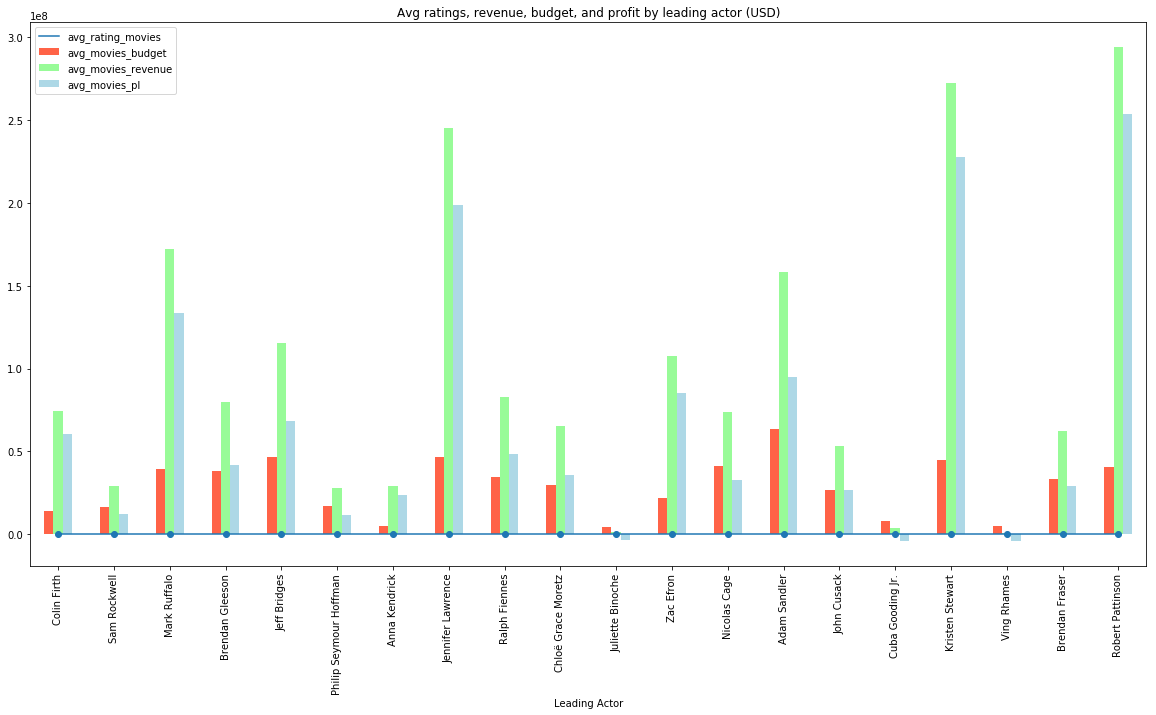

In [46]:
ax=actors[['main_actor','avg_rating_movies']].plot(x='main_actor',linestyle='-',marker='o')
actors[["main_actor","avg_movies_budget","avg_movies_revenue","avg_movies_pl"]].plot(x='main_actor',kind='bar', color=['tomato', 'palegreen', 'lightblue'],ax=ax, figsize=(20,10))
plt.title('Avg ratings, revenue, budget, and profit by leading actor (USD)')
plt.xlabel('Leading Actor')
plt.show()

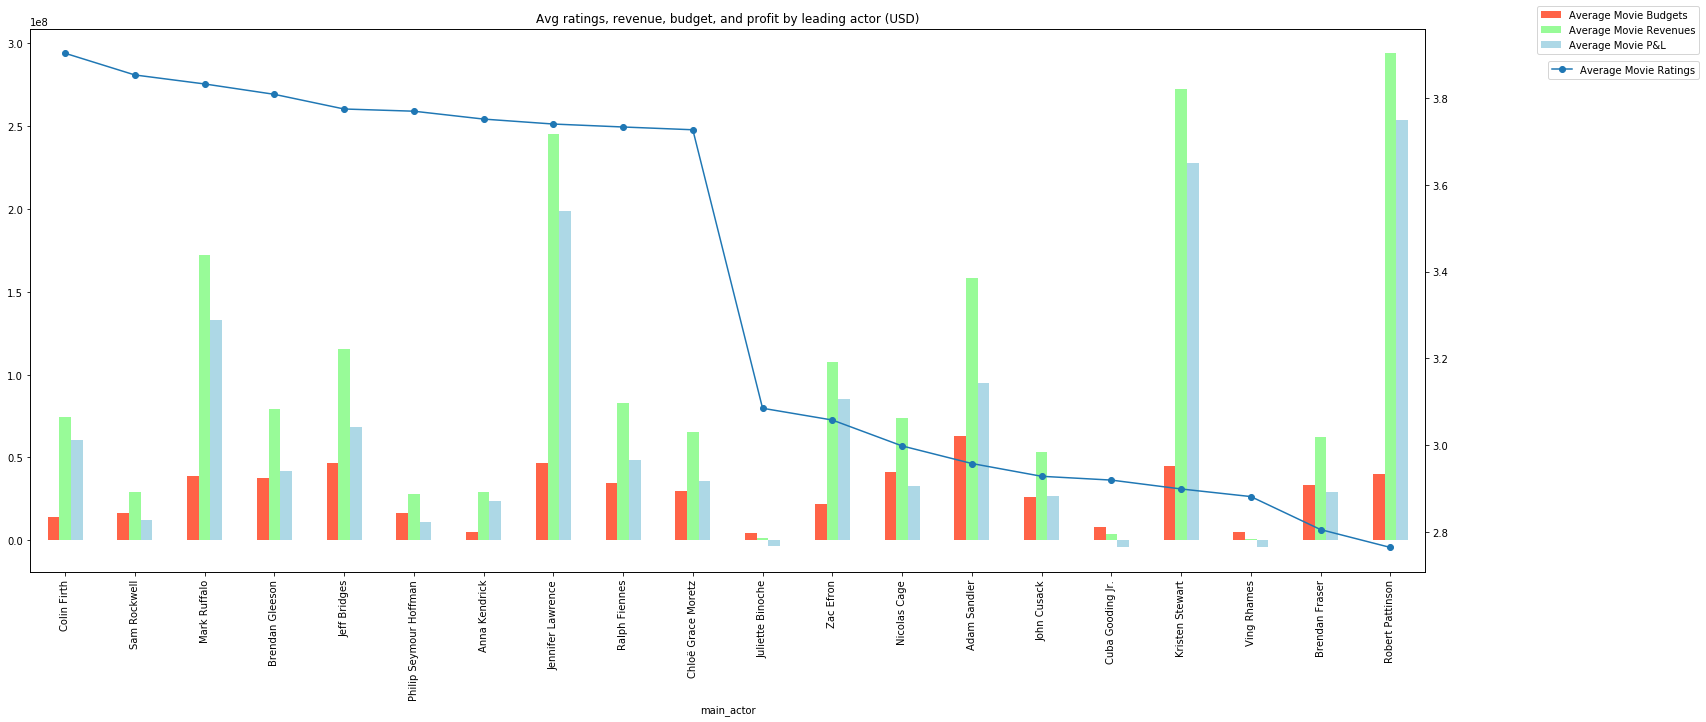

In [85]:

ax=actors[["main_actor","avg_movies_budget","avg_movies_revenue","avg_movies_pl"]].plot(x='main_actor',kind='bar', color=['tomato', 'palegreen', 'lightblue'],figsize=(25,10))
ax2=ax.twinx()
ax2.plot(ax.get_xticks(),actors[['avg_rating_movies']].values,linestyle='-',marker='o')
ax.legend(list(['Average Movie Budgets', 'Average Movie Revenues', 'Average Movie P&L']),bbox_to_anchor=(1.2, 1.05))

ax2.legend(list(['Average Movie Ratings']), bbox_to_anchor=(1.2,0.95))

plt.title('Avg ratings, revenue, budget, and profit by leading actor (USD)')
plt.xlabel('Actors')

plt.show()

## Revenue vs Actors

In [ ]:


actors_top_rv=actor_analysis[["main_actor","avg_movies_revenue","nr_movies"]].copy()


#only actores that starred in over 10 movies (not to be too biased over people that starred in few movies)
actors_top_rv_more_10=actors_top_rv[actors_top_rv.nr_movies>10].copy()
actors_top_rv_more_10.dropna(inplace=True)
actors_top_rv_more_10.sort_values(by='avg_movies_revenue',axis=0,ascending=False,inplace=True)

actors_top_rv_more_10

In [ ]:
plt.figure()

ax = actors_top_rv_more_10.plot(kind='bar',x='main_actor',y='avg_movies_revenue',colormap='summer',figsize=(25,10),fontsize=14,title='Average Revenue per Movies Starred',legend=False)
ax.set(xlabel='Actors', ylabel='Average Revenues')
ax.title.set_size(30)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.show()

## Budget vs Actors

In [ ]:
actors_top_bd=actor_analysis[["main_actor","avg_movies_budget","nr_movies"]].copy()

#only actors that starred in over 10 movies (not to be too biased over people that starred in few movies)
actors_top_bd_more_10=actors_top_bd[actors_top_bd.nr_movies>10].copy()
actors_top_bd_more_10.dropna(inplace=True)
actors_top_bd_more_10.sort_values(by='avg_movies_budget',axis=0,ascending=False,inplace=True)

actors_top_bd_more_10

In [ ]:
plt.figure()

ax = actors_top_bd_more_10.plot(kind='bar',x='main_actor',y='avg_movies_budget',colormap='RdYlGn',figsize=(25,10),fontsize=14,title='Average Budget per Movies Starred',legend=False)
ax.set(xlabel='Actors', ylabel='Average Budgets')
ax.title.set_size(30)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.show()

## P&L vs Actors

In [ ]:
actors_top_pl=actor_analysis[["main_actor","avg_movies_pl","nr_movies"]].copy()

#only actors that starred in over 10 movies (not to be too biased over people that starred in few movies)
actors_top_pl_more_10=actors_top_pl[actors_top_pl.nr_movies>10].copy()
actors_top_pl_more_10.dropna(inplace=True)
actors_top_pl_more_10.sort_values(by='avg_movies_pl',axis=0,ascending=False,inplace=True)

actors_top_pl_more_10

In [ ]:
plt.figure()

ax = actors_top_pl_more_10.plot(kind='bar',x='main_actor',y='avg_movies_pl',colormap='Pastel1',figsize=(25,10),fontsize=14,title='Average P&L per Movies Starred',legend=False)
ax.set(xlabel='Actors', ylabel='Average P&L')
ax.title.set_size(30)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.show()



In [ ]:
actor_top_stars=actor_analysis[actor_analysis.nr_movies>10].copy()
actor_top_stars